In [55]:
%matplotlib inline

In [56]:
from __future__ import division

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vtk_rw import read_vtk, write_vtk
import nibabel as nb

In [58]:
rh_tsnr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/tsnr/rh_tsnr_min.npy'
rh_snr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/inv2prob/rh_inv2prob_min.npy'
rh_mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/rh_lowres_new.vtk'
rh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/rh_medial_wall.npy'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'


lh_tsnr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/tsnr/lh_tsnr_min.npy'
lh_snr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/inv2prob/lh_inv2prob_min.npy'
lh_mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/lh_lowres_new.vtk'
lh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/lh_medial_wall.npy'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'

In [59]:
rh_tsnr_min=np.load(rh_tsnr_min_file)
rh_snr_min=np.load(rh_snr_min_file)
rh_mask = np.load(rh_mask_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, rd = read_vtk(rh_mesh_file)

In [60]:
lh_tsnr_min=np.load(lh_tsnr_min_file)
lh_snr_min=np.load(lh_snr_min_file)
lh_mask = np.load(lh_mask_file)
lh_sulc = np.load(lh_sulc_file)
lv, lf, ld = read_vtk(lh_mesh_file)

In [61]:
rh_mask=np.asarray(rh_mask, dtype='int64')
lh_mask=np.asarray(lh_mask, dtype='int64')

In [62]:
from plotting import plot_surf_stat_map, crop_img
sns.set_context('notebook', font_scale=1.5)

### tsnr mask

In [63]:
rh_tsnr_masked = np.delete(rh_tsnr_min,rh_mask)
lh_tsnr_masked = np.delete(lh_tsnr_min,lh_mask)

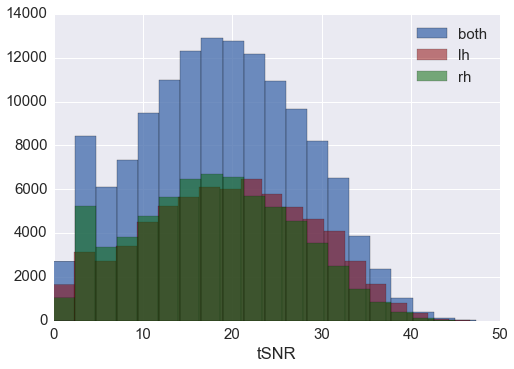

In [64]:
sns.set_style('darkgrid')
plt.hist(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)), label='both', alpha=0.8, bins=20)
plt.hist(lh_tsnr_masked, label='lh', color='darkred', alpha=0.5, bins=20)
plt.hist(rh_tsnr_masked, label='rh', color='darkgreen', alpha=0.5, bins=20)
plt.legend()
plt.xlabel('tSNR')

In [65]:
std_tsnr = np.std(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)))
mean_tsnr = np.mean(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)))

In [66]:
print std_tsnr
print mean_tsnr
print mean_tsnr-std_tsnr
print mean_tsnr-1.5*std_tsnr
print mean_tsnr-2*std_tsnr

9.14185931255
18.6890003153
9.54714100272
4.97621134645
0.405281690178


In [67]:
rh_tsnr_min[rh_mask]=0
lh_tsnr_min[lh_mask]=0

#### 1 SDV

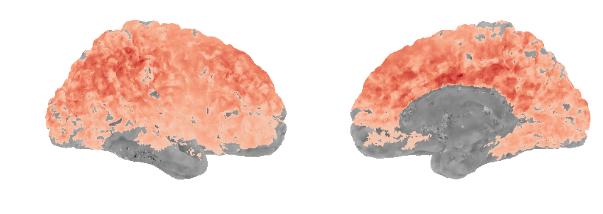

In [68]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_tsnr-std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_tsnr-std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

ERROR! Session/line number was not unique in database. History logging moved to new session 1999


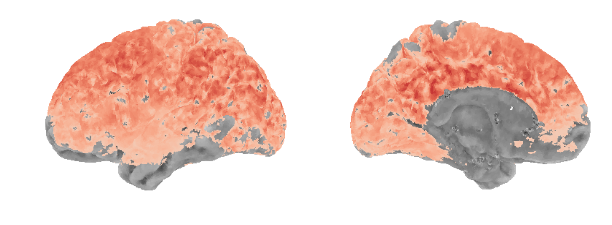

In [77]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_tsnr-std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_tsnr-std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 2 SDV

ERROR! Session/line number was not unique in database. History logging moved to new session 2000


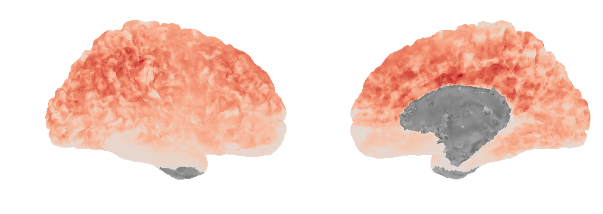

In [78]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_tsnr-2*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_tsnr-2*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

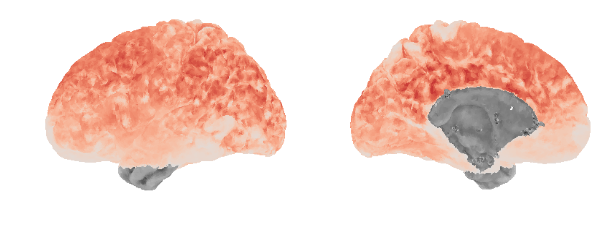

In [79]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_tsnr-2*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_tsnr-2*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 1.5 SDV

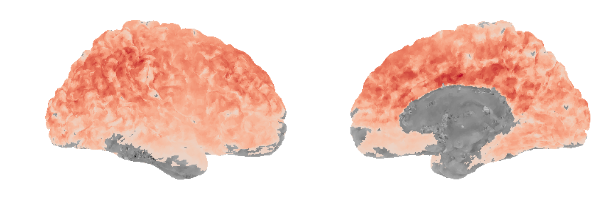

In [80]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_tsnr-1.5*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_tsnr-1.5*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

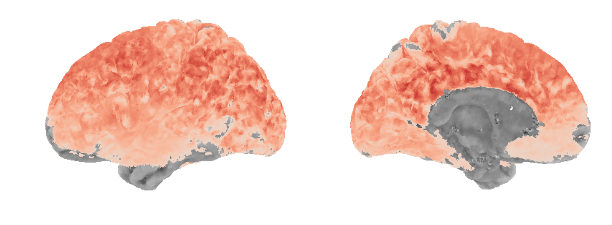

In [81]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_tsnr-1.5*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_tsnr-1.5*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### INV2 prob mask

In [69]:
rh_snr_masked = np.delete(rh_snr_min,rh_mask)
lh_snr_masked = np.delete(lh_snr_min,lh_mask)

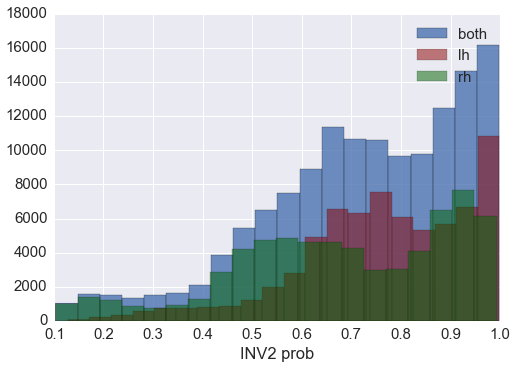

In [70]:
sns.set_style('darkgrid')
plt.hist(np.concatenate((lh_snr_masked, rh_snr_masked)), label='both', alpha=0.8, bins=20)
plt.hist(lh_snr_masked, label='lh', color='darkred', alpha=0.5, bins=20)
plt.hist(rh_snr_masked, label='rh', color='darkgreen', alpha=0.5, bins=20)
plt.legend()
plt.xlabel('INV2 prob')

In [71]:
std_snr = np.std(np.concatenate((lh_snr_masked, rh_snr_masked)))
mean_snr = np.mean(np.concatenate((lh_snr_masked, rh_snr_masked)))

In [72]:
print std_snr
print mean_snr
print mean_snr-std_snr
print mean_snr-1.5*std_snr
print mean_snr-2*std_snr

0.2016844489
0.723727429815
0.522042980916
0.421200756466
0.320358532016


In [82]:
std_snr_rh = np.std(rh_snr_masked)
mean_snr_rh = np.mean(rh_snr_masked)
print mean_snr_rh - 1.5*std_snr_rh

0.34786583082


In [83]:
std_snr_lh = np.std(lh_snr_masked)
mean_snr_lh = np.mean(lh_snr_masked)
print mean_snr_lh - 1.5*std_snr_lh

0.510907891813


In [84]:
rh_snr_min[rh_mask]=0
lh_snr_min[lh_mask]=0

#### 1 SDV

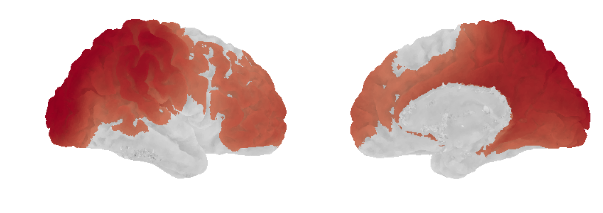

In [85]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr-1*std_snr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr-1*std_snr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

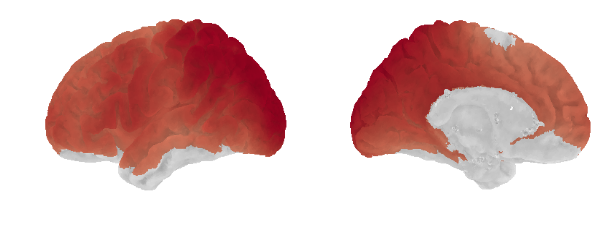

In [86]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr-1*std_snr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr-1*std_snr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 2 SDV

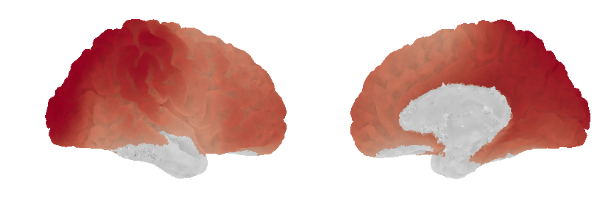

In [87]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr-2*std_snr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr-2*std_snr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

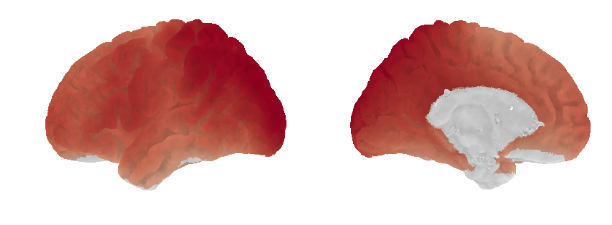

In [88]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr-2*std_snr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr-2*std_snr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 1.5 SDV

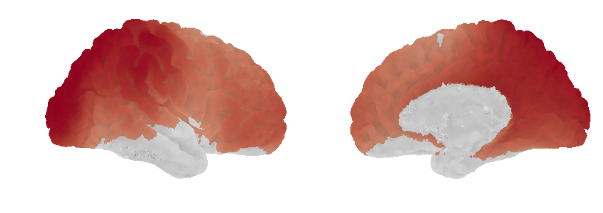

In [89]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr-1.5*std_snr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr-1.5*std_snr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

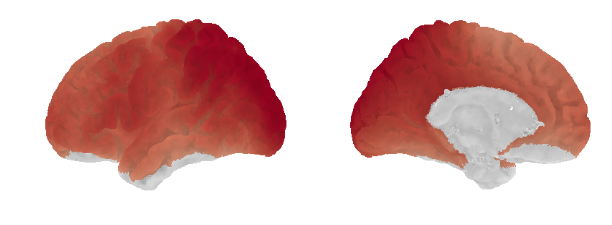

In [90]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr-1.5*std_snr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr-1.5*std_snr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 1.5 SDV hemisphere specific

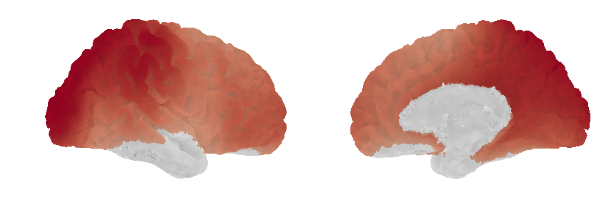

In [91]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr_rh-1.5*std_snr_rh)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr_rh-1.5*std_snr_rh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

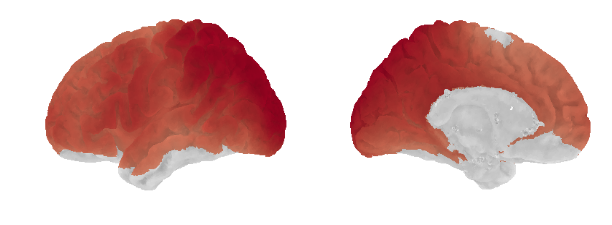

In [92]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr_lh-1.5*std_snr_lh)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr_lh-1.5*std_snr_lh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### combined mask

In [93]:
rh_mask = np.unique(np.concatenate((np.where(rh_tsnr_min<=mean_tsnr-1.5*std_tsnr)[0],
                                    np.where(rh_snr_min<=mean_snr_rh-1.5*std_snr_rh)[0])))

In [94]:
lh_mask = np.unique(np.concatenate((np.where(lh_tsnr_min<=mean_tsnr-1.5*std_tsnr)[0],
                                    np.where(lh_snr_min<=mean_snr_lh-1.5*std_snr_lh)[0])))

In [95]:
rh_mask_plot = np.zeros_like(rh_snr_min)
rh_mask_plot[rh_mask] = 1

In [96]:
lh_mask_plot = np.zeros_like(lh_snr_min)
lh_mask_plot[lh_mask] = 1

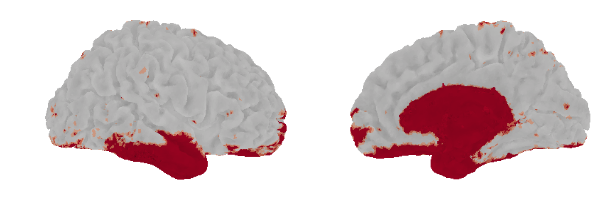

In [97]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_mask_plot, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10))

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_mask_plot, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

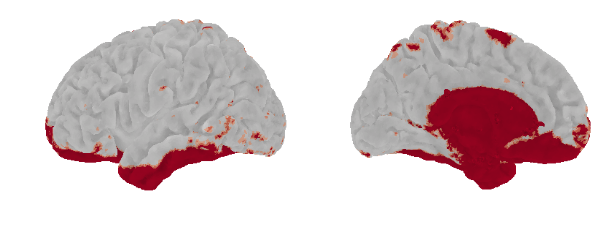

In [98]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_mask_plot, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9))

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_mask_plot, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [99]:
np.save('/scr/ilz3/myelinconnect/new_groupavg/masks/rh_fullmask.npy', rh_mask)

In [100]:
np.save('/scr/ilz3/myelinconnect/new_groupavg/masks/lh_fullmask.npy', lh_mask)